# ***Quantifying Speckle Noise***

## Calculating Speckle Contrast:

Importing Libraries:

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import os
from google.colab import drive

In [11]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Speckle Image Cropping Function:

In [86]:
def SpeckleCropping(image,ROI_size):
  pic = cv2.imread(image)
  pic = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)

  normalized_pic = np.divide(pic,np.max(np.max(pic)))

  height, width = normalized_pic.shape[:2]

  # Cropping outer 20% of image for evaluation
  crop_top = int(height * 0.1)
  crop_bottom = int(height * 0.9)
  crop_left = int(width * 0.1)
  crop_right = int(width * 0.9)

  cropped_pic = normalized_pic[crop_top:crop_bottom, crop_left:crop_right]

  min_intensity = np.min(cropped_pic)
  min_locations = np.where(cropped_pic == min_intensity)

  x_min = 0
  y_min = 0

  while x_min <= 0 and y_min <= 0:
    rand_indx = np.random.randint(0, len(min_locations[0]))
    x_min = min_locations[0][rand_indx]
    y_min = min_locations[1][rand_indx]

  speckle_crop = cropped_pic[y_min-int(ROI_size/2):y_min+int(ROI_size/2),
                             x_min-int(ROI_size/2):x_min+int(ROI_size/2)]

  return speckle_crop, x_min, y_min

Speckle Contrast Function:

In [23]:
def SpeckleContrast(Speckle_matrix):
  sigma = np.std(Speckle_matrix)
  meanI = np.mean(Speckle_matrix)

  speckle_contrast = (meanI/sigma)

  return speckle_contrast

Testing Speckle Contrast Function on Image:

a. Changing Directory:

In [16]:
dir = '/content/drive/MyDrive/OCT Resized/train/CNV'

In [17]:
os.chdir(dir)

In [18]:
!pwd

/content/drive/MyDrive/OCT Resized/train/CNV


b. Loading in Image:

In [98]:
CNV_images = os.listdir(dir)

random_index = np.random.randint(0, len(CNV_images))

image = CNV_images[random_index]

ROI_size = 8

c. Cropping Outer 20% of Image for Evaluation:

In [99]:
Speckle_matrix, x_min, y_min = SpeckleCropping(image,ROI_size)
print(Speckle_matrix)
print("Location of minimum intensity:"+str(y_min)+","+str(x_min))

[[0.11372549 0.03921569 0.11372549 0.10196078 0.01960784 0.1372549
  0.1254902  0.12156863]
 [0.01176471 0.16862745 0.14117647 0.20784314 0.21568627 0.19215686
  0.27843137 0.21960784]
 [0.17254902 0.2        0.18039216 0.05098039 0.09803922 0.1372549
  0.25098039 0.24705882]
 [0.10980392 0.0627451  0.09019608 0.05490196 0.1372549  0.03137255
  0.23921569 0.21960784]
 [0.1254902  0.09803922 0.18431373 0.03529412 0.04313725 0.05882353
  0.22352941 0.10588235]
 [0.09019608 0.0745098  0.02745098 0.07058824 0.05490196 0.16470588
  0.12941176 0.05882353]
 [0.11764706 0.06666667 0.15294118 0.25490196 0.19215686 0.1254902
  0.00392157 0.14509804]
 [0.04705882 0.07843137 0.12941176 0.22745098 0.09411765 0.14117647
  0.17254902 0.18823529]]
Location of minimum intensity:180,4


Found the location of the minimum intensity in image to represent background. Need to isolate a portion of the background, not the sample itself to determine speckle constrast.

e. Evaluating the Speckle Contrast

In [100]:
SpeckleContrast(Speckle_matrix)

1.8566572804201436

f. Display the Image with the Speckle Noise ROI

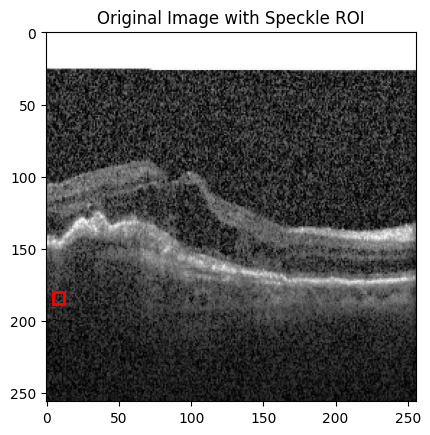

In [101]:
plt.figure()
plt.imshow(cv2.imread(image))
rectangle = patches.Rectangle((x_min, y_min), ROI_size, ROI_size, linewidth=2, edgecolor='r', facecolor='none')
plt.gca().add_patch(rectangle)
plt.title('Original Image with Speckle ROI')
plt.show()